<a href="https://colab.research.google.com/github/rhdtka21/Intro-To-AI/blob/master/HW2_SeokJungwoo_2015003209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to AI – HW2

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Q1

In [0]:
x_train = np.linspace(0, 2 * np.pi, 30)
y_train = np.cos(x_train) + np.random.normal(loc=0.0, scale=0.5, size=30)

### Q2

In [0]:
x_valid = np.linspace(0, 2 * np.pi, 15)
y_valid = np.cos(x_valid) + np.random.normal(loc=0.0, scale=0.5, size=15)

### Q3

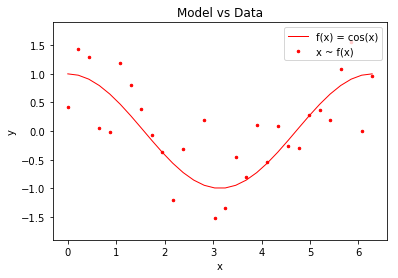

In [0]:
y = np.cos(x_train)
plt.ylim((-1.9, 1.9))

plt.plot(x_train, y, 'r-', markersize=5.0, linewidth = 1, label = 'f(x) = cos(x)')
plt.plot(x_train, y_train, 'r.', markersize=5.0, label = 'x ~ f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs Data')
plt.legend(loc = 'upper right')

plt.show()

### Q4

In [0]:
'''
회귀 분석을 위해서 sklearn 을 import 해서 사용했습니다.

model은 LinearRegression을 적용하는 모델입니다.
test 데이터 x, y를 이용해서 하나의 polynomial 모델을 만들어 줍니다.
np.vader()를 이용해서 x를 x의 제곱형태의 행렬로 만들어 주었습니다.
만들어진 행렬과 y를 fitting하고 그 모델을 return 해줍니다.

그리고 나서 poly_model 함수를 이용해서, polynomial 모델과, 실제 train, valid 값과의 MSE값을 구합니다.


 이용해서 OLS_y를 구합니다.

각 degree에 해당하는 MSE값 또한 함께 계산해서 return 해주었습니다.

'''
from sklearn.linear_model import LinearRegression

def model_OLS(x, y, degree):


    model = LinearRegression()
    model.fit(np.vander(x, degree+1), y)
    
    return model

def poly_model(model, x, y):
    
    degree = model.coef_.size - 1
    OLS_y = model.predict(np.vander(x, degree + 1))

    MSE = sum((y - OLS_y)**2) / len(x)

    return OLS_y, MSE



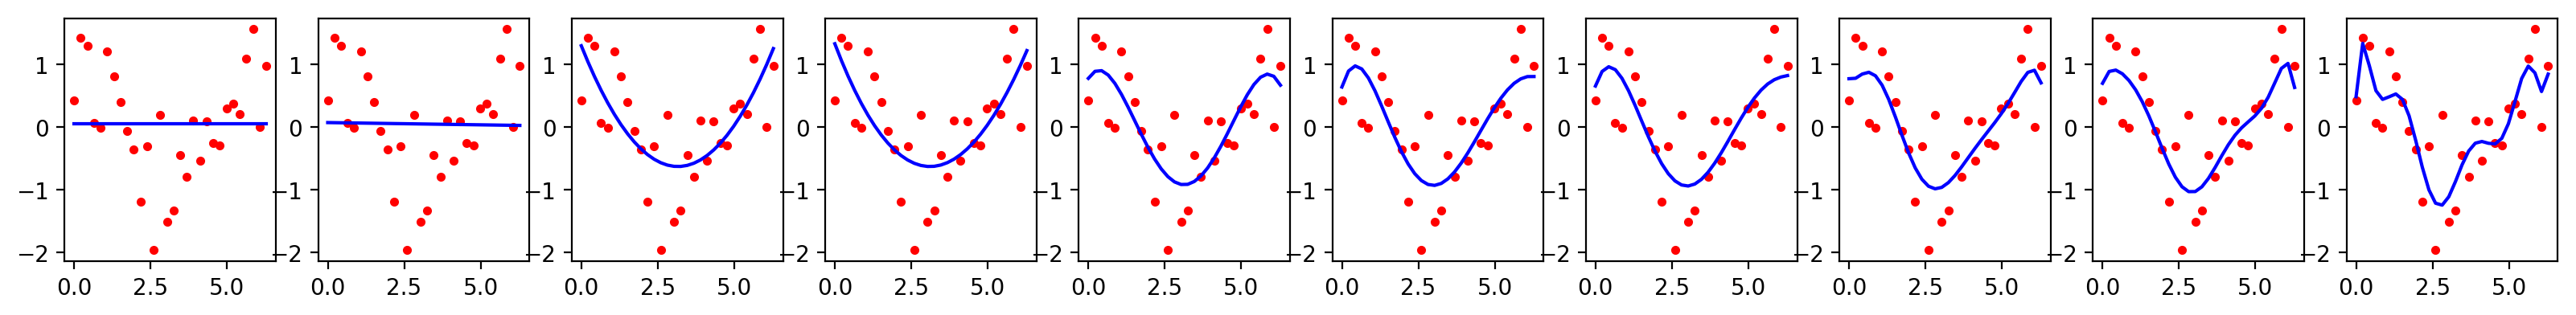

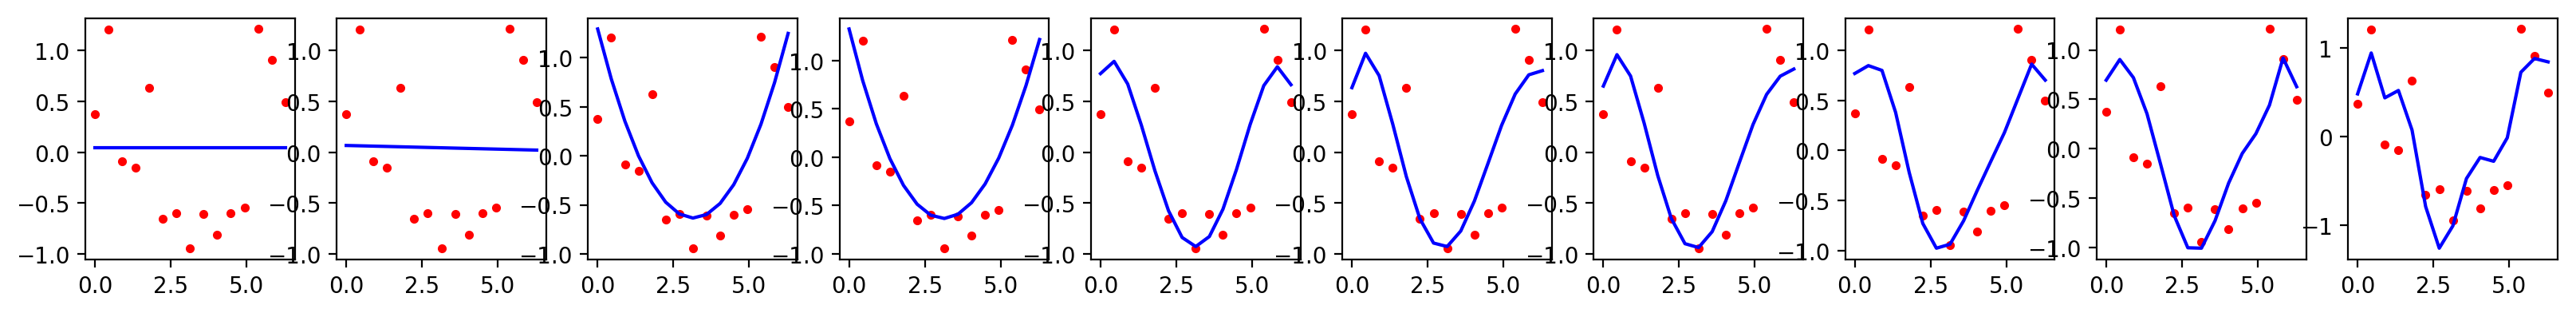

In [0]:
f, axes1 = plt.subplots(nrows=1, ncols=10, figsize=(20, 2), dpi=200)
f, axes2 = plt.subplots(nrows=1, ncols=10, figsize=(20, 2), dpi=200)
# 2*10의 subplots은 그림이 너무 작아서 두개로 나타냈습니다.

MSEs_train = []
MSEs_valid = []
#각각의 degree에 해당하는 MSE값을 담는 list

for i in range(10):
    # i = degree
    
    model = model_OLS(x_train, y_train, i)
    #train 데이터로 polynomial 모델을 생성합니다.
    
    OLS_y_train, MSE_train = poly_model(model,x_train, y_train)
    OLS_y_valid, MSE_valid = poly_model(model,x_valid, y_valid)
    #모델을 적용시킨 OLS y값과 MSE값을 받습니다.
    
    axes1[i].plot(x_train, y_train, 'r.')
    axes1[i].plot(x_train, OLS_y_train,'b')
    MSEs_train.append(MSE_train)
    #그래프 그리기
    
    axes2[i].plot(x_valid, y_valid, 'r.')
    axes2[i].plot(x_valid, OLS_y_valid,'b')
    MSEs_valid.append(MSE_valid)
    #그래프 그리기
    

### Q5

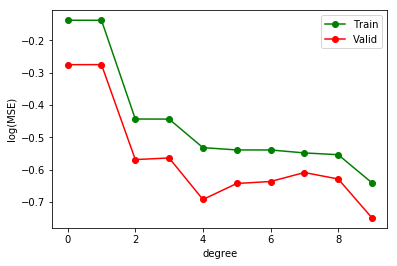

In [0]:
degree = np.arange(10)
val_train = np.array(np.log10(MSEs_train))
val_valid = np.array(np.log10(MSEs_valid))
plt.plot(degree, val_train, 'go-', label = 'Train')
plt.plot(degree, val_valid, 'ro-', label = 'Valid')

plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.legend(loc = 'upper right')
plt.savefig('line_plot_plus.jpg')
plt.show()

문제 5번의 경우에, 실행하는 경우에 따라서 overfitting이 발생할때도, underfitting이 발생할때도 있었고, 상황에 따라서는 Train 데이터와 Valid 데이터와의 MSE값이 거의 비슷한 잘 fitting된 경우도 나타 났습니다.

1. ![line_plot_plus0.jpg](attachment:line_plot_plus0.jpg)
2. ![line_plot_plus1.jpg](attachment:line_plot_plus1.jpg)
3. ![line_plot_plus2.jpg](attachment:line_plot_plus2.jpg)
4. ![line_plot_plus3.jpg](attachment:line_plot_plus3.jpg)
5. ![line_plot_plus4.jpg](attachment:line_plot_plus4.jpg)
6. ![line_plot_plus5.jpg](attachment:line_plot_plus5.jpg)
7. ![line_plot_plus6.jpg](attachment:line_plot_plus6.jpg)
8. ![line_plot_plus7.jpg](attachment:line_plot_plus7.jpg)
9. ![line_plot_plus8.jpg](attachment:line_plot_plus8.jpg)
10. ![line_plot_plus9.jpg](attachment:line_plot_plus9.jpg)